# Importación de librerias

In [316]:
import numpy as np
import os
from os import walk
import pandas as pd
import tsfel
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Lectura de archivos de caidas/no caidas

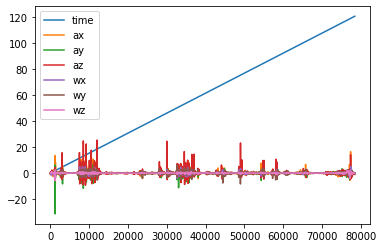

In [332]:
df = pd.read_csv('No_Caida/1.csv')
#df = df.drop(df.columns[7], axis=1)
#df.to_csv('No_Caidas/012.csv', index=False)
df.plot()
plt.show()

In [333]:
df.head(5)

,time,ax,ay,az,wx,wy,wz
0,0.002,-0.36,-0.22,-1.12,-0.29,0.06,-0.01
1,0.002,-0.28,-0.22,-1.09,-0.29,0.06,-0.01
2,0.003,-0.28,-0.22,-1.09,-0.32,0.05,0.00
3,0.003,-0.28,-0.22,-1.09,-0.35,0.05,0.01
4,0.003,-0.26,-0.27,-0.98,-0.35,0.05,0.01


In [334]:
df.describe()

,time,ax,ay,az,wx,wy,wz
count,78457.000000,78457.000000,78457.000000,78457.000000,78457.000000,78457.000000,78457.000000
mean,60.338272,0.015238,-0.109292,-0.097004,-0.036515,0.073891,-0.011260
std,34.841856,1.172324,1.059096,1.647813,0.668752,0.848634,0.349283
min,0.002000,-8.500000,-31.410000,-9.390000,-4.090000,-8.380000,-5.760000
25%,30.165000,-0.270000,-0.230000,-0.350000,-0.160000,-0.160000,-0.050000
50%,60.335000,-0.010000,-0.020000,-0.040000,-0.010000,0.010000,0.000000
75%,90.522000,0.250000,0.160000,0.210000,0.090000,0.280000,0.050000
max,120.682000,16.470000,6.680000,25.440000,5.120000,6.350000,2.370000


In [335]:
len_df = len(df)
print(len_df)
df.dropna(inplace=True) 
len_after_df = len(df)
print(len_after_df)

if len(df) == len(df.dropna()):
    print("No se han encontrado datos nulos")
else:
    print("Se encontraron " + str(len_df - len_after_df) + " nulos")

78457
78457
No se han encontrado datos nulos


# Graficación de acelerometro y giroscopio

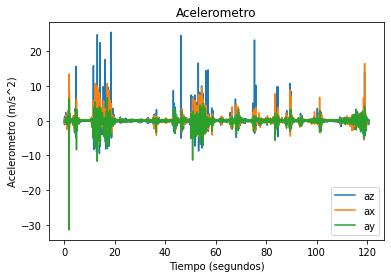

In [336]:
plt.title("Acelerometro")
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Acelerometro (m/s^2)")
plt.plot(df['time'], df['az'], label='az')
plt.plot(df['time'], df['ax'], label='ax')
plt.plot(df['time'], df['ay'], label='ay')

plt.legend()
plt.show()

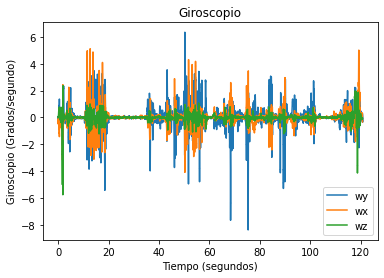

In [337]:
plt.title("Giroscopio")
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Giroscopio (Grados/segundo)")
plt.plot(df['time'], df['wy'], label='wy')
plt.plot(df['time'], df['wx'], label='wx')
plt.plot(df['time'], df['wz'], label='wz')
plt.legend()
plt.show()

# Extracción de características de caidas

In [317]:
ds = pd.DataFrame()

def readData(path, caida):
    try:
        df = pd.read_csv(path)
        df = df.dropna()

        cfg = tsfel.get_features_by_domain()

        ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)
        ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)
        az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)

        wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)
        wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)
        wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)

        otroDataFrame = pd.DataFrame({'Caida': [caida]*ax_extracted_features.shape[0]})

        return pd.concat([otroDataFrame, ax_extracted_features, ay_extracted_features, az_extracted_features, 
                wx_extracted_features, wy_extracted_features, wz_extracted_features], axis=1)
    except:
        pass

pathCaida = []
for (dirpath, dirnames, filenames) in walk('Caida/'):
    pathCaida.extend(filenames)
print(pathCaida)

for x in pathCaida:
    ds = pd.concat([ds, readData('Caida/' + x, 1)], axis=0)
    print(readData('Caida/' + x, 1))
print(ds)

for x in pathCaida:
    ds = pd.concat([ds, readData('No_Caida/' + x, 0)], axis=0)
    print(readData('No_Caida/' + x, 1))
print(ds)

ds.to_csv(r'Caida.csv', index=False)

['1.csv', '2.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv', '8.csv']
*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


   Caida  0_FFT mean coefficient_0  0_FFT mean coefficient_1  \
0      1                  0.132085                  3.042511   

   0_FFT mean coefficient_2  0_FFT mean coefficient_3  \
0                  2.927502                  2.800327   

   0_FFT mean coefficient_4  0_FFT mean coefficient_5  \
0                  2.091819                  1.102064   

   0_FFT mean coefficient_6  0_FFT mean coefficient_7  \
0                  0.875626                  1.176028   

   0_FFT mean coefficient_8  ...  0_Median diff  0_Negative turning points  \
0                  0.887498  ...            0.0                       30.0   

   0_Neighbourhood peaks  0_Peak to peak distance  0_Positive turning points  \
0                   12.0                    16.58                       26.0   

   0_Signal distance   0_Slope  0_Sum absolute diff  0_Total energy  \
0       30772.740382  0.000002               267.32        36.06053   

   0_Zero crossing rate  
0                 422.0  

[1 rows x 23

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


   Caida  0_FFT mean coefficient_0  0_FFT mean coefficient_1  \
0      1                  0.027088                  0.499488   

   0_FFT mean coefficient_2  0_FFT mean coefficient_3  \
0                  1.087891                  0.280965   

   0_FFT mean coefficient_4  0_FFT mean coefficient_5  \
0                  0.437796                  0.355547   

   0_FFT mean coefficient_6  0_FFT mean coefficient_7  \
0                   0.54326                  0.449776   

   0_FFT mean coefficient_8  ...  0_Median diff  0_Negative turning points  \
0                    0.7024  ...            0.0                       11.0   

   0_Neighbourhood peaks  0_Peak to peak distance  0_Positive turning points  \
0                   12.0                     2.47                       18.0   

   0_Signal distance       0_Slope  0_Sum absolute diff  0_Total energy  \
0       14564.629231 -8.298997e-07                95.32        4.821618   

   0_Zero crossing rate  
0                 289.0  

[1 r

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


   Caida  0_FFT mean coefficient_0  0_FFT mean coefficient_1  \
0      1                  0.395029                 14.259278   

   0_FFT mean coefficient_2  0_FFT mean coefficient_3  \
0                  4.167078                   2.98504   

   0_FFT mean coefficient_4  0_FFT mean coefficient_5  \
0                   3.01043                  1.862288   

   0_FFT mean coefficient_6  0_FFT mean coefficient_7  \
0                  1.208616                  0.923239   

   0_FFT mean coefficient_8  ...  0_Median diff  0_Negative turning points  \
0                  0.891855  ...            0.0                      145.0   

   0_Neighbourhood peaks  0_Peak to peak distance  0_Positive turning points  \
0                   32.0                    10.02                      133.0   

   0_Signal distance   0_Slope  0_Sum absolute diff  0_Total energy  \
0       30221.612917 -0.000002               395.44        81.34371   

   0_Zero crossing rate  
0                 839.0  

[1 rows x 23

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


   Caida  0_FFT mean coefficient_0  0_FFT mean coefficient_1  \
0      1                  0.044757                  1.292231   

   0_FFT mean coefficient_2  0_FFT mean coefficient_3  \
0                  1.189343                  0.983739   

   0_FFT mean coefficient_4  0_FFT mean coefficient_5  \
0                  0.739763                  0.459762   

   0_FFT mean coefficient_6  0_FFT mean coefficient_7  \
0                  0.503173                  0.526052   

   0_FFT mean coefficient_8  ...  0_Median diff  0_Negative turning points  \
0                  0.171102  ...            0.0                      174.0   

   0_Neighbourhood peaks  0_Peak to peak distance  0_Positive turning points  \
0                   33.0                    12.17                      170.0   

   0_Signal distance   0_Slope  0_Sum absolute diff  0_Total energy  \
0       79885.731347  0.000002               492.84       29.625755   

   0_Zero crossing rate  
0                1309.0  

[1 rows x 23

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


   Caida  0_FFT mean coefficient_0  0_FFT mean coefficient_1  \
0      1                  0.056155                  0.481255   

   0_FFT mean coefficient_2  0_FFT mean coefficient_3  \
0                  1.551824                  0.328492   

   0_FFT mean coefficient_4  0_FFT mean coefficient_5  \
0                  0.871964                  0.482325   

   0_FFT mean coefficient_6  0_FFT mean coefficient_7  \
0                  0.683241                  0.776766   

   0_FFT mean coefficient_8  ...  0_Median diff  0_Negative turning points  \
0                  0.734411  ...            0.0                       19.0   

   0_Neighbourhood peaks  0_Peak to peak distance  0_Positive turning points  \
0                   22.0                     2.12                       27.0   

   0_Signal distance       0_Slope  0_Sum absolute diff  0_Total energy  \
0       16932.717928 -4.184387e-07               141.91         4.43032   

   0_Zero crossing rate  
0                 483.0  

[1 r

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


   Caida  0_FFT mean coefficient_0  0_FFT mean coefficient_1  \
0      1                  0.268758                   9.19349   

   0_FFT mean coefficient_2  0_FFT mean coefficient_3  \
0                  8.430774                  6.073243   

   0_FFT mean coefficient_4  0_FFT mean coefficient_5  \
0                  2.515605                  1.928931   

   0_FFT mean coefficient_6  0_FFT mean coefficient_7  \
0                  0.917391                  0.599522   

   0_FFT mean coefficient_8  ...  0_Median diff  0_Negative turning points  \
0                  0.380318  ...            0.0                      161.0   

   0_Neighbourhood peaks  0_Peak to peak distance  0_Positive turning points  \
0                   49.0                     7.94                      183.0   

   0_Signal distance   0_Slope  0_Sum absolute diff  0_Total energy  \
0       44364.102298  0.000004                456.5       40.826123   

   0_Zero crossing rate  
0                1018.0  

[1 rows x 23

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


   Caida  0_FFT mean coefficient_0  0_FFT mean coefficient_1  \
0      1                  0.132286                  5.455448   

   0_FFT mean coefficient_2  0_FFT mean coefficient_3  \
0                  5.360226                  3.381122   

   0_FFT mean coefficient_4  0_FFT mean coefficient_5  \
0                  1.831383                  1.326156   

   0_FFT mean coefficient_6  0_FFT mean coefficient_7  \
0                  0.829915                  0.770553   

   0_FFT mean coefficient_8  ...  0_Median diff  0_Negative turning points  \
0                   0.58756  ...            0.0                        2.0   

   0_Neighbourhood peaks  0_Peak to peak distance  0_Positive turning points  \
0                    2.0                  10.6439                        3.0   

   0_Signal distance   0_Slope  0_Sum absolute diff  0_Total energy  \
0       45632.109574  0.000013             298.7343        47.45328   

   0_Zero crossing rate  
0                 355.0  

[1 rows x 23

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


   Caida  0_FFT mean coefficient_0  0_FFT mean coefficient_1  \
0      1                  0.246221                  8.267485   

   0_FFT mean coefficient_2  0_FFT mean coefficient_3  \
0                  6.973996                  4.919505   

   0_FFT mean coefficient_4  0_FFT mean coefficient_5  \
0                  3.118543                  1.122422   

   0_FFT mean coefficient_6  0_FFT mean coefficient_7  \
0                  1.253275                  0.759075   

   0_FFT mean coefficient_8  ...  0_Median diff  0_Negative turning points  \
0                  0.610748  ...            0.0                        2.0   

   0_Neighbourhood peaks  0_Peak to peak distance  0_Positive turning points  \
0                    0.0                  10.9569                        1.0   

   0_Signal distance   0_Slope  0_Sum absolute diff  0_Total energy  \
0       64242.593152  0.000006             483.1446       40.401717   

   0_Zero crossing rate  
0                 450.0  

[1 rows x 23

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


   Caida  0_FFT mean coefficient_0  0_FFT mean coefficient_1  \
0      1                  0.036374                  1.345688   

   0_FFT mean coefficient_2  0_FFT mean coefficient_3  \
0                  2.096778                  1.084538   

   0_FFT mean coefficient_4  0_FFT mean coefficient_5  \
0                  0.523767                  0.418424   

   0_FFT mean coefficient_6  0_FFT mean coefficient_7  \
0                  0.362394                  0.246103   

   0_FFT mean coefficient_8  ...  0_Median diff  0_Negative turning points  \
0                  0.139397  ...            0.0                       76.0   

   0_Neighbourhood peaks  0_Peak to peak distance  0_Positive turning points  \
0                   27.0                     8.13                       95.0   

   0_Signal distance   0_Slope  0_Sum absolute diff  0_Total energy  \
0       78462.883387  0.000001               333.35       12.212537   

   0_Zero crossing rate  
0                1663.0  

[1 rows x 23

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


   Caida  0_FFT mean coefficient_0  0_FFT mean coefficient_1  \
0      1                  0.040785                  1.465042   

   0_FFT mean coefficient_2  0_FFT mean coefficient_3  \
0                  1.771576                  0.967041   

   0_FFT mean coefficient_4  0_FFT mean coefficient_5  \
0                  0.434392                  0.252767   

   0_FFT mean coefficient_6  0_FFT mean coefficient_7  \
0                  0.159093                  0.168926   

   0_FFT mean coefficient_8  ...  0_Median diff  0_Negative turning points  \
0                  0.119041  ...            0.0                       96.0   

   0_Neighbourhood peaks  0_Peak to peak distance  0_Positive turning points  \
0                   28.0                     5.34                       79.0   

   0_Signal distance   0_Slope  0_Sum absolute diff  0_Total energy  \
0       74020.767163  0.000001               364.36        9.476861   

   0_Zero crossing rate  
0                1441.0  

[1 rows x 23

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


   Caida  0_FFT mean coefficient_0  0_FFT mean coefficient_1  \
0      1                  0.003372                  0.084703   

   0_FFT mean coefficient_2  0_FFT mean coefficient_3  \
0                  0.133097                  0.099345   

   0_FFT mean coefficient_4  0_FFT mean coefficient_5  \
0                  0.093161                  0.092171   

   0_FFT mean coefficient_6  0_FFT mean coefficient_7  \
0                  0.155388                  0.110688   

   0_FFT mean coefficient_8  ...  0_Median diff  0_Negative turning points  \
0                  0.061674  ...            0.0                       12.0   

   0_Neighbourhood peaks  0_Peak to peak distance  0_Positive turning points  \
0                   11.0                     1.89                       15.0   

   0_Signal distance   0_Slope  0_Sum absolute diff  0_Total energy  \
0       17570.484142 -0.000002               116.05        6.205141   

   0_Zero crossing rate  
0                 247.0  

[1 rows x 23

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


   Caida  0_FFT mean coefficient_0  0_FFT mean coefficient_1  \
0      1                  0.277254                 11.576771   

   0_FFT mean coefficient_2  0_FFT mean coefficient_3  \
0                  9.795423                   6.96432   

   0_FFT mean coefficient_4  0_FFT mean coefficient_5  \
0                  3.988339                  1.745599   

   0_FFT mean coefficient_6  0_FFT mean coefficient_7  \
0                  0.973364                  0.650867   

   0_FFT mean coefficient_8  ...  0_Median diff  0_Negative turning points  \
0                  0.587193  ...            0.0                      146.0   

   0_Neighbourhood peaks  0_Peak to peak distance  0_Positive turning points  \
0                   26.0                     7.77                      138.0   

   0_Signal distance   0_Slope  0_Sum absolute diff  0_Total energy  \
0       41351.373719  0.000002               437.02       43.091856   

   0_Zero crossing rate  
0                1000.0  

[1 rows x 23

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


   Caida  0_FFT mean coefficient_0  0_FFT mean coefficient_1  \
0      1                  0.128871                  6.271101   

   0_FFT mean coefficient_2  0_FFT mean coefficient_3  \
0                  4.381905                  3.060295   

   0_FFT mean coefficient_4  0_FFT mean coefficient_5  \
0                  2.425968                  1.168741   

   0_FFT mean coefficient_6  0_FFT mean coefficient_7  \
0                  0.736871                  0.709498   

   0_FFT mean coefficient_8  ...  0_Median diff  0_Negative turning points  \
0                   0.51214  ...            0.0                        0.0   

   0_Neighbourhood peaks  0_Peak to peak distance  0_Positive turning points  \
0                    3.0                  10.9954                        3.0   

   0_Signal distance   0_Slope  0_Sum absolute diff  0_Total energy  \
0       53139.250619  0.000012             394.6433       45.685815   

   0_Zero crossing rate  
0                 644.0  

[1 rows x 23

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


   Caida  0_FFT mean coefficient_0  0_FFT mean coefficient_1  \
0      1                  0.079707                  3.776364   

   0_FFT mean coefficient_2  0_FFT mean coefficient_3  \
0                  2.950775                   1.63411   

   0_FFT mean coefficient_4  0_FFT mean coefficient_5  \
0                  1.073026                  0.506738   

   0_FFT mean coefficient_6  0_FFT mean coefficient_7  \
0                  0.339719                  0.272104   

   0_FFT mean coefficient_8  ...  0_Median diff  0_Negative turning points  \
0                  0.172514  ...            0.0                        4.0   

   0_Neighbourhood peaks  0_Peak to peak distance  0_Positive turning points  \
0                    1.0                  11.1525                        3.0   

   0_Signal distance   0_Slope  0_Sum absolute diff  0_Total energy  \
0       84046.556898  0.000002             441.1648       26.812806   

   0_Zero crossing rate  
0                1247.0  

[1 rows x 23

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


   Caida  0_FFT mean coefficient_0  0_FFT mean coefficient_1  \
0      1                  0.132286                  5.455448   

   0_FFT mean coefficient_2  0_FFT mean coefficient_3  \
0                  5.360226                  3.381122   

   0_FFT mean coefficient_4  0_FFT mean coefficient_5  \
0                  1.831383                  1.326156   

   0_FFT mean coefficient_6  0_FFT mean coefficient_7  \
0                  0.829915                  0.770553   

   0_FFT mean coefficient_8  ...  0_Median diff  0_Negative turning points  \
0                   0.58756  ...            0.0                        2.0   

   0_Neighbourhood peaks  0_Peak to peak distance  0_Positive turning points  \
0                    2.0                  10.6439                        3.0   

   0_Signal distance   0_Slope  0_Sum absolute diff  0_Total energy  \
0       45632.109574  0.000013             298.7343        47.45328   

   0_Zero crossing rate  
0                 355.0  

[1 rows x 23

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:10: UserWarning: Using default sampling frequency set in configuration file.
  ax_extracted_features = tsfel.time_series_features_extractor(cfg, df['ax'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:11: UserWarning: Using default sampling frequency set in configuration file.
  ay_extracted_features = tsfel.time_series_features_extractor(cfg, df['ay'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:12: UserWarning: Using default sampling frequency set in configuration file.
  az_extracted_features = tsfel.time_series_features_extractor(cfg, df['az'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:14: UserWarning: Using default sampling frequency set in configuration file.
  wx_extracted_features = tsfel.time_series_features_extractor(cfg, df['wx'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:15: UserWarning: Using default sampling frequency set in configuration file.
  wy_extracted_features = tsfel.time_series_features_extractor(cfg, df['wy'], windows_size=100)


*** Feature extraction started ***
60


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_8824\591833966.py:16: UserWarning: Using default sampling frequency set in configuration file.
  wz_extracted_features = tsfel.time_series_features_extractor(cfg, df['wz'], windows_size=100)


   Caida  0_FFT mean coefficient_0  0_FFT mean coefficient_1  \
0      1                  0.246221                  8.267485   

   0_FFT mean coefficient_2  0_FFT mean coefficient_3  \
0                  6.973996                  4.919505   

   0_FFT mean coefficient_4  0_FFT mean coefficient_5  \
0                  3.118543                  1.122422   

   0_FFT mean coefficient_6  0_FFT mean coefficient_7  \
0                  1.253275                  0.759075   

   0_FFT mean coefficient_8  ...  0_Median diff  0_Negative turning points  \
0                  0.610748  ...            0.0                        2.0   

   0_Neighbourhood peaks  0_Peak to peak distance  0_Positive turning points  \
0                    0.0                  10.9569                        1.0   

   0_Signal distance   0_Slope  0_Sum absolute diff  0_Total energy  \
0       64242.593152  0.000006             483.1446       40.401717   

   0_Zero crossing rate  
0                 450.0  

[1 rows x 23

# Entrenamiento del modelo

In [319]:
data = pd.read_csv('Caida.csv')
print(data.shape)
data.head()

(16, 2341)


,Caida,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_2,0_FFT mean coefficient_3,0_FFT mean coefficient_4,0_FFT mean coefficient_5,0_FFT mean coefficient_6,0_FFT mean coefficient_7,0_FFT mean coefficient_8,...,0_Median diff.5,0_Negative turning points.5,0_Neighbourhood peaks.5,0_Peak to peak distance.5,0_Positive turning points.5,0_Signal distance.5,0_Slope.5,0_Sum absolute diff.5,0_Total energy.5,0_Zero crossing rate.5
0,1,0.132085,3.042511,2.927502,2.800327,2.091819,1.102064,0.875626,1.176028,0.887498,...,0.0,30.0,12.0,16.58,26.0,30772.740382,1.959646e-06,267.32,36.060530,422.0
1,1,0.027088,0.499488,1.087891,0.280965,0.437796,0.355547,0.543260,0.449776,0.702400,...,0.0,11.0,12.0,2.47,18.0,14564.629231,-8.298997e-07,95.32,4.821618,289.0
2,1,0.395029,14.259278,4.167078,2.985040,3.010430,1.862288,1.208616,0.923239,0.891855,...,0.0,145.0,32.0,10.02,133.0,30221.612917,-2.278738e-06,395.44,81.343710,839.0
3,1,0.044757,1.292231,1.189343,0.983739,0.739763,0.459762,0.503173,0.526052,0.171102,...,0.0,174.0,33.0,12.17,170.0,79885.731347,2.104734e-06,492.84,29.625755,1309.0
4,1,0.056155,0.481255,1.551824,0.328492,0.871964,0.482325,0.683241,0.776766,0.734411,...,0.0,19.0,22.0,2.12,27.0,16932.717928,-4.184387e-07,141.91,4.430320,483.0


In [320]:
X = data[data.columns[1:]]
y = data['Caida']

In [327]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


x_train = x_train.astype(float)
x_test = x_test.astype(float)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# SVM 

In [338]:
model = svm.SVC(kernel='rbf', gamma='auto')
model.fit(x_train, y_train)
model_predictions = model.predict(x_test)

print("SVM accuracy score: ", accuracy_score(y_test, model_predictions))

SVM accuracy score:  0.6


# K-Nearest Neighbors

In [328]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_predictions = knn.predict(x_test)

print("K neighbors accuracy score: ", accuracy_score(y_test, knn_predictions))

K neighbors precision:  0.6


# Naive Bayes

In [329]:
native_bayes = GaussianNB()
native_bayes.fit(x_train, y_train)
native_bayes_predictions = native_bayes.predict(x_test)

print("Naive bayes accuracy score: ", accuracy_score(y_test, native_bayes_predictions))

native bayes perecision:  0.8


# Decision tree Classifier

In [330]:
decisionTree = DecisionTreeClassifier(max_depth=20, random_state=2)
decisionTree.fit(x_train, y_train)
decisionTree_prediction = decisionTree.predict(x_test)

print("DecisionTree accuracy score: ", accuracy_score(y_test, decisionTree_prediction))

DecisionTree precision:  0.4


# Random Forest Classifier

In [331]:
randomForest = RandomForestClassifier(n_estimators=80, max_depth=20, random_state=2)
randomForest.fit(x_train, y_train)
randomForest_prediction = randomForest.predict(x_test)

print("RandomForest accuracy score: ", accuracy_score(y_test, randomForest_prediction))

RandomForest precision:  0.6
